# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
# Load Data
df = pd.read_csv("wholesale_data.csv")

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# log transformation to skewed columns with high stds
cols_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_log_transformed = df.copy()
df_log_transformed[cols_to_transform] = np.log1p(df[cols_to_transform])  

# summary statistics post transformation
print(df_log_transformed.describe())

          Channel      Region       Fresh        Milk     Grocery      Frozen  \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     1.322727    2.543182    8.732813    8.121615    8.442205    7.303128   
std      0.468052    0.774272    1.470618    1.080635    1.111523    1.281888   
min      1.000000    1.000000    1.386294    4.025352    1.386294    3.258097   
25%      1.000000    2.000000    8.048378    7.335633    7.675081    6.611024   
50%      1.000000    3.000000    9.048404    8.196435    8.467267    7.331043   
75%      2.000000    3.000000    9.737123    8.880619    9.273948    8.176177   
max      2.000000    3.000000   11.627610   11.205027   11.437997   11.016496   

       Detergents_Paper  Delicassen  
count        440.000000  440.000000  
mean           6.791781    6.671094  
std            1.709519    1.293960  
min            1.386294    1.386294  
25%            5.551989    6.014321  
50%            6.706242    6.873680  
75% 

<Figure size 1200x600 with 0 Axes>

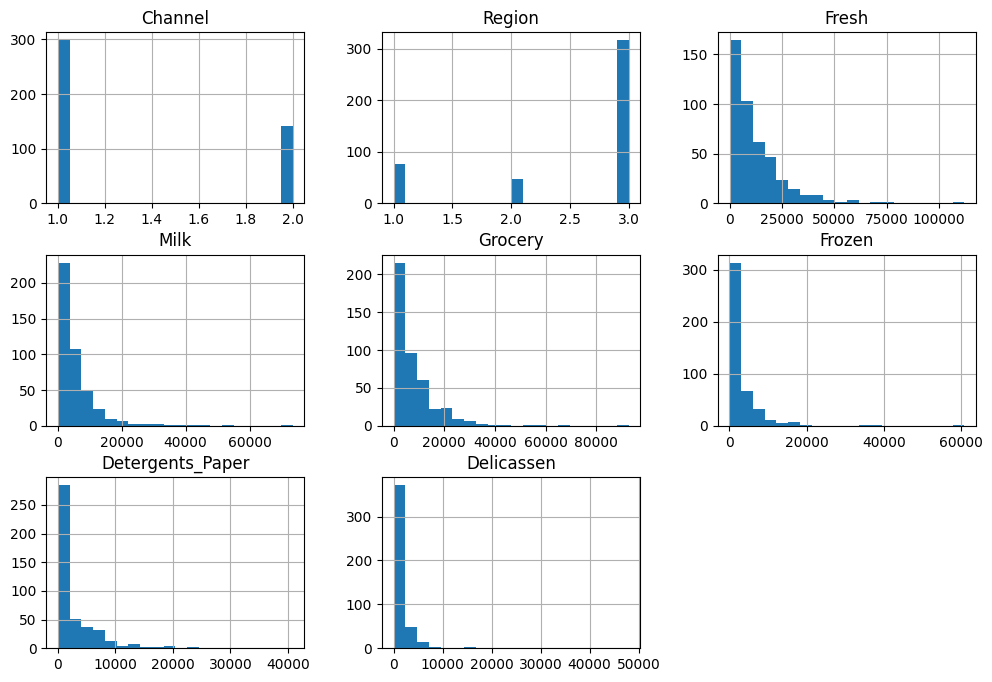

In [13]:
# Visualizing distributions
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 8))
plt.show()

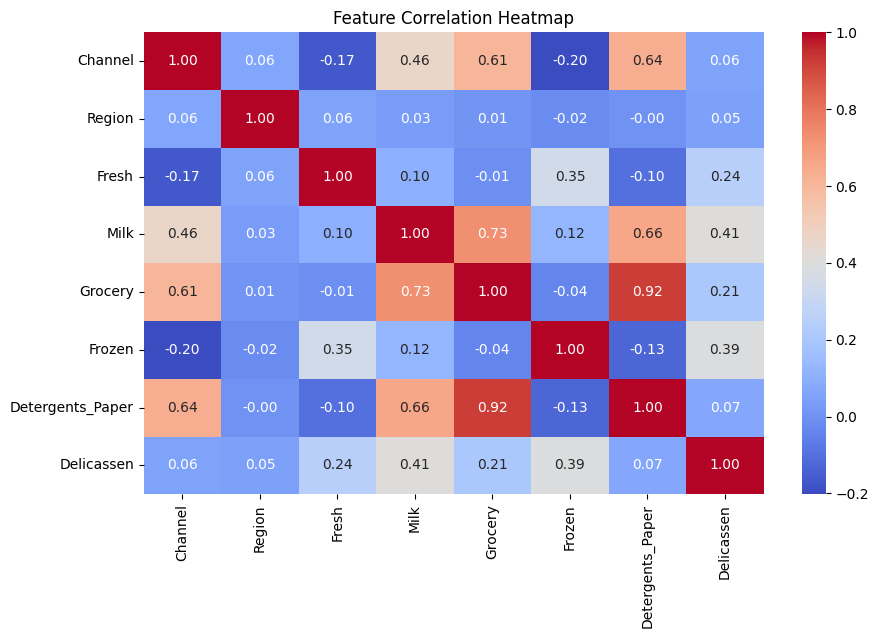

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Standardize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [ ]:
# Selecting numerical features (excluding categorical)
cols_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [ ]:
# Log Transformation
df_log = df.copy()
df_log[cols_to_transform] = np.log1p(df[cols_to_transform])  


In [ ]:
# Standardization 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_log[cols_to_transform]), columns=cols_to_transform)


In [ ]:
# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

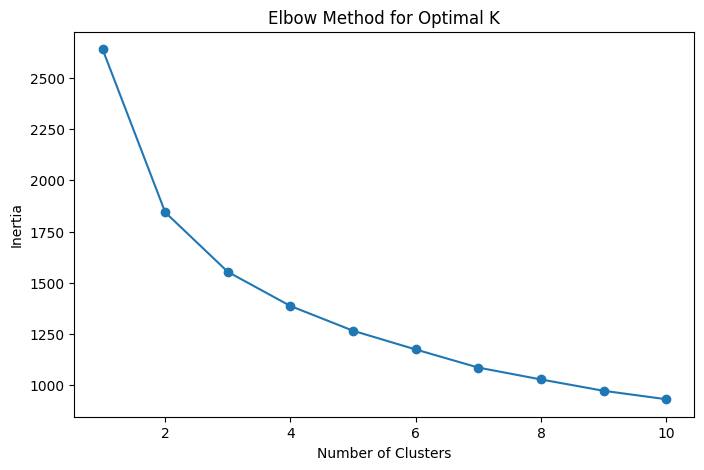

In [36]:
# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
# Choose optimal K 
optimal_k = 3  

In [ ]:
# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

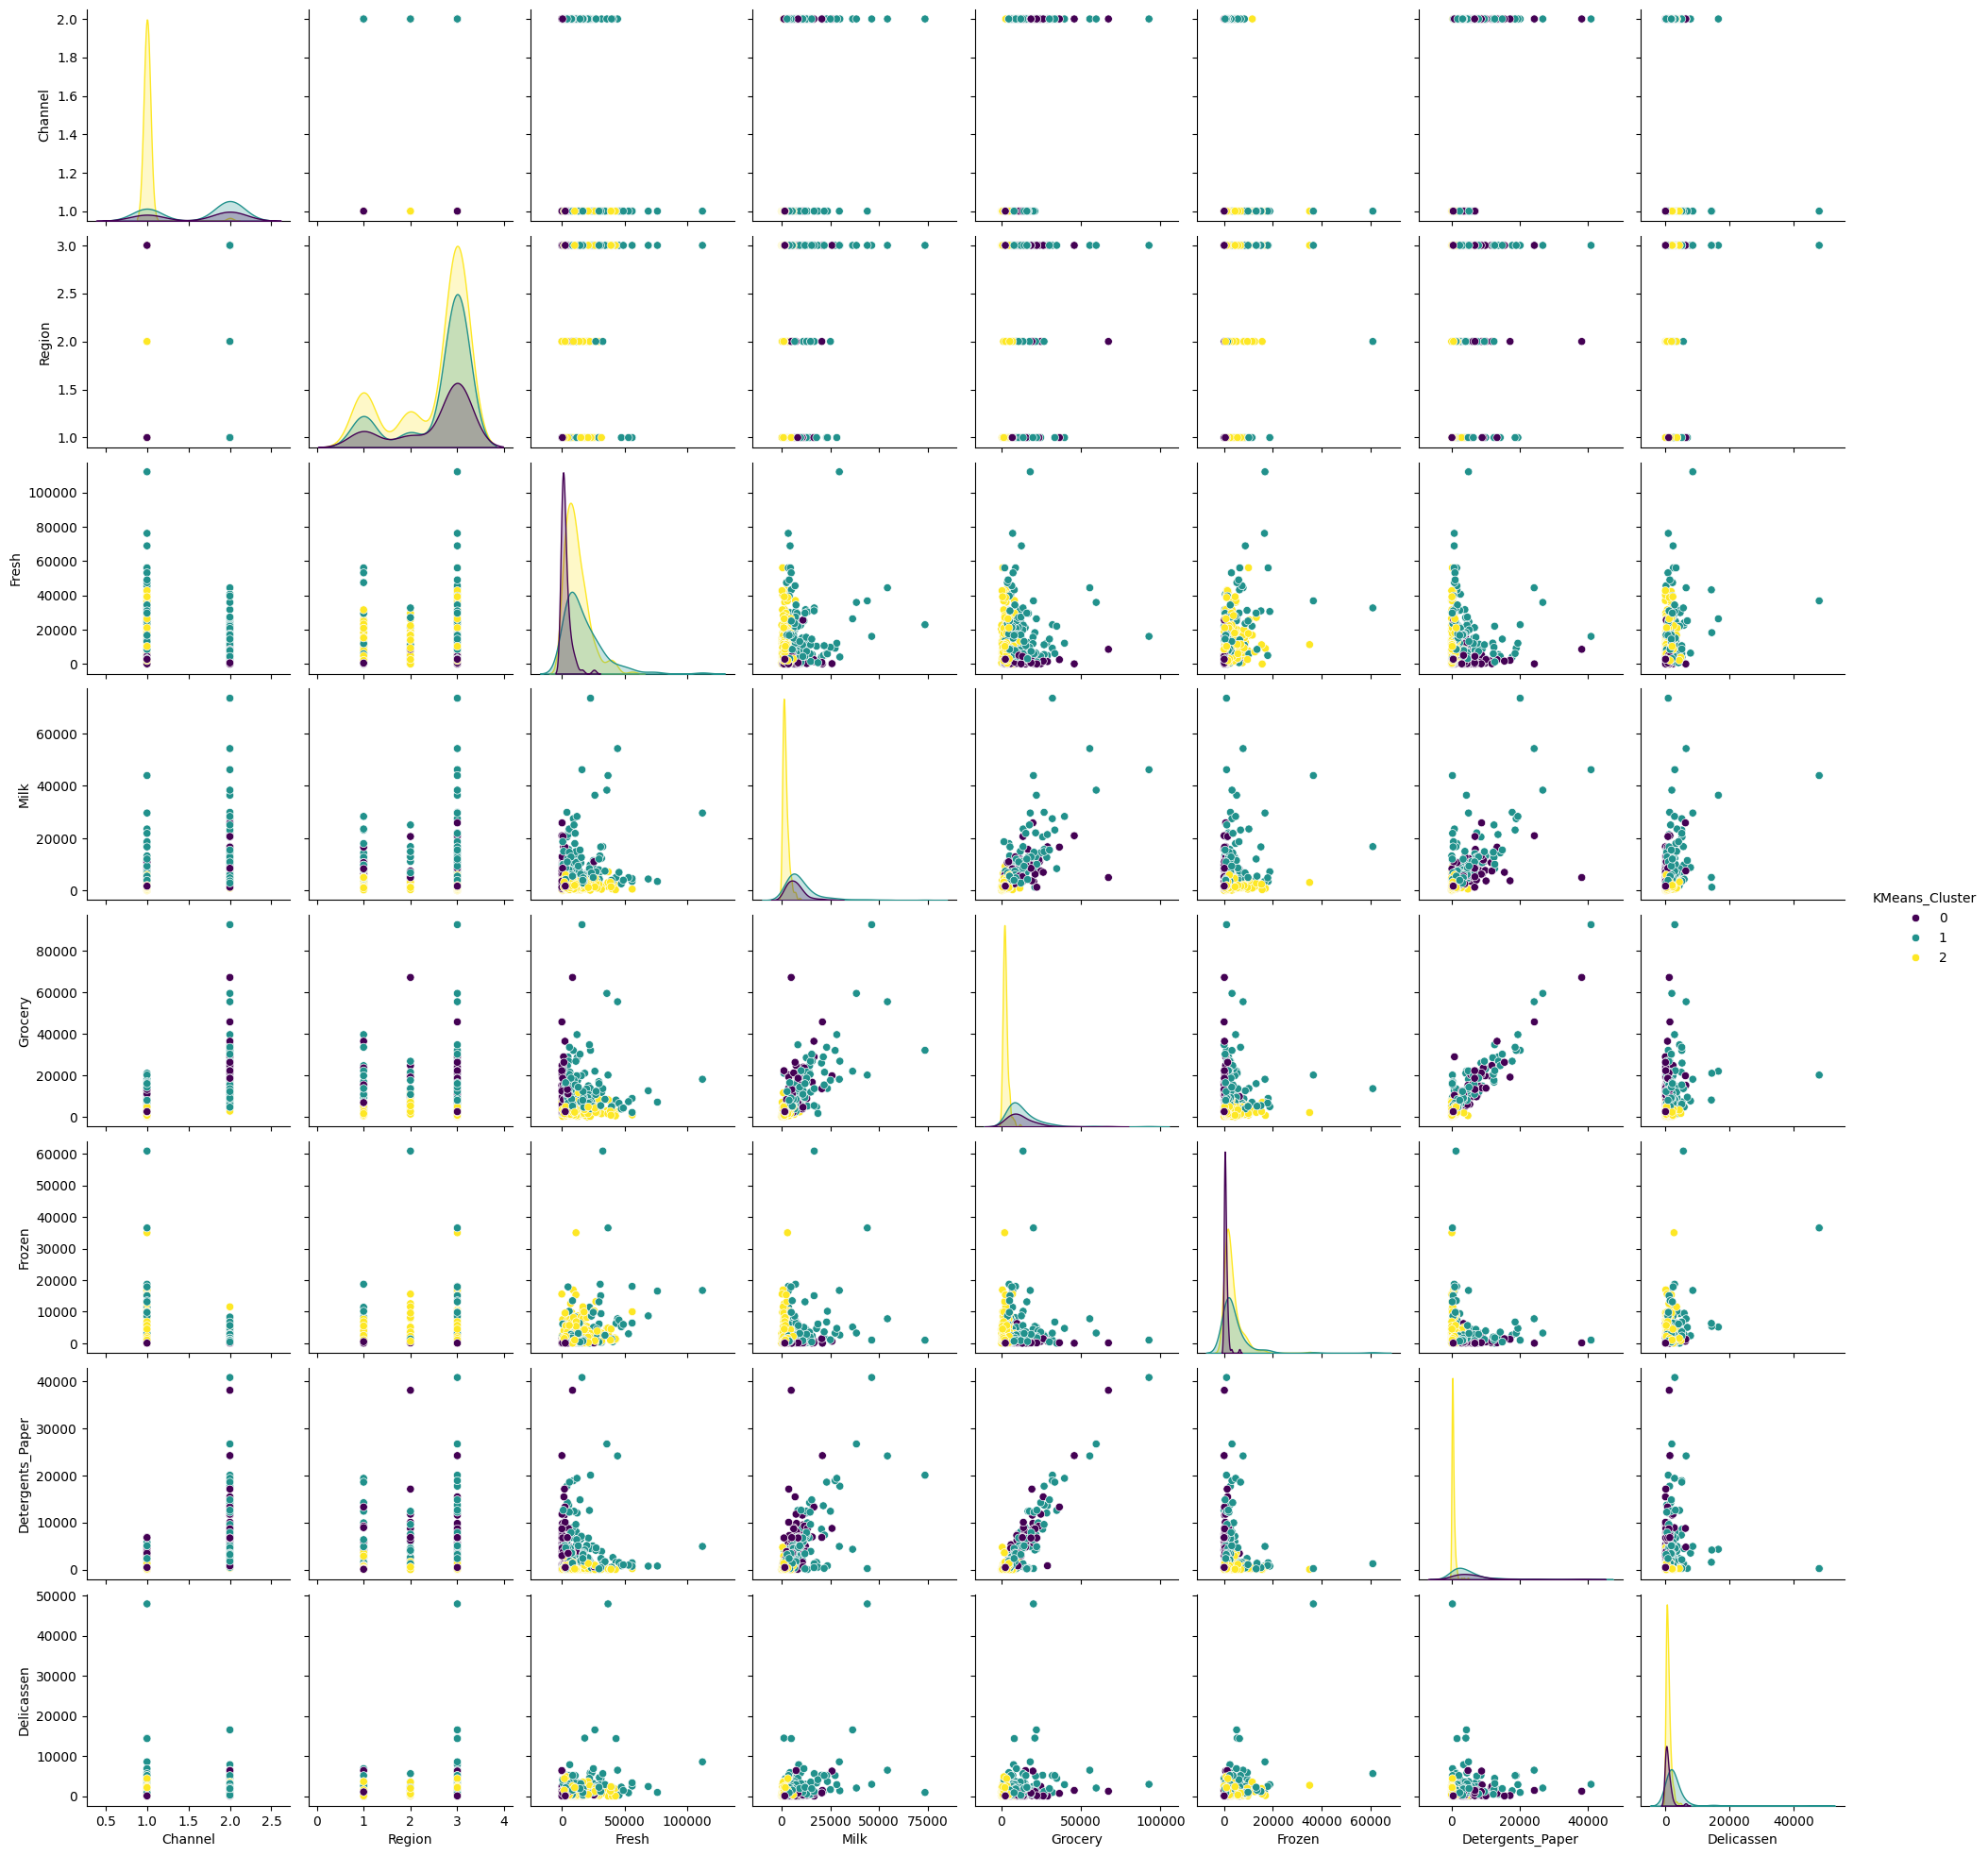

In [ ]:
# Pairplot visualization
sns.pairplot(df, hue="KMeans_Cluster", palette="viridis")
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

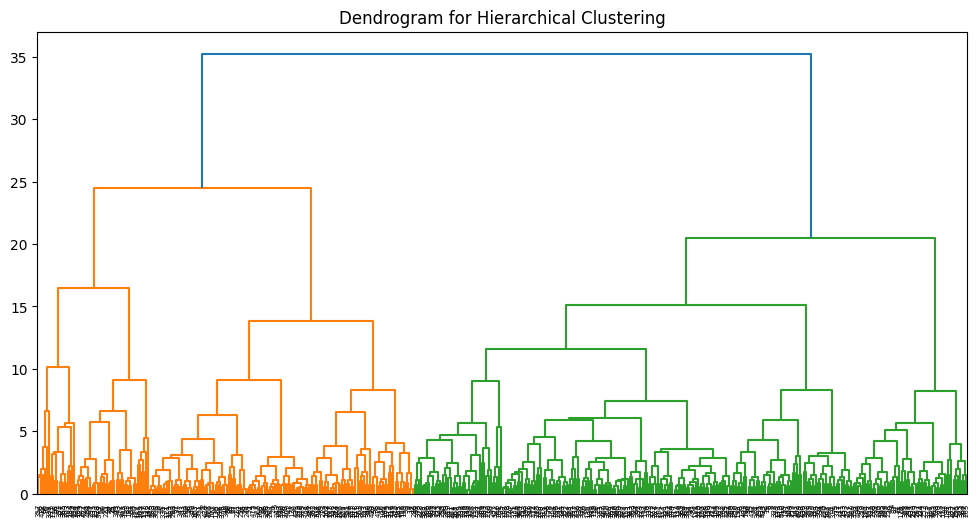

In [ ]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [ ]:
# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
df['Hierarchical_Cluster'] = agglo.fit_predict(df_scaled)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

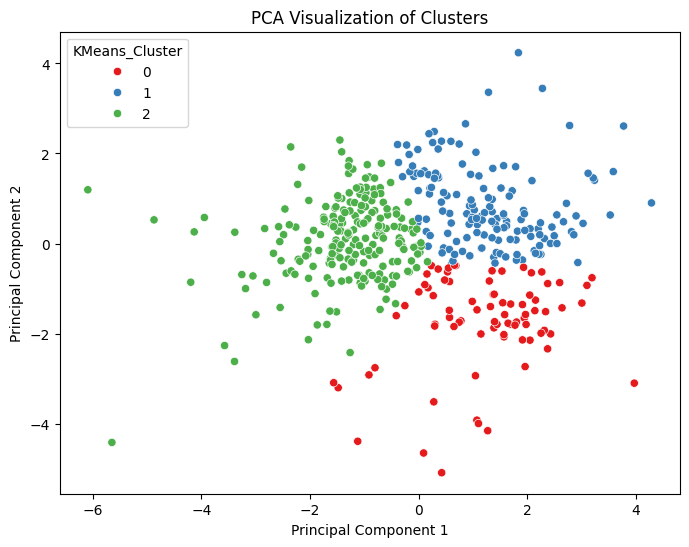

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Clusters")
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. The PCA visualization shows that KMeans successfully segmented the data into three distinct clusters. These clusters appear well-separated along the principal components, suggesting meaningful differences in customer purchasing behavior.

2. The dendrogram from hierarchical clustering suggests a natural grouping structure in the data. The branching structure indicates varying levels of similarity among customers, reinforcing the presence of well-defined clusters.

3. From the pair plot, we can see certain variables such as "Fresh," "Grocery," and "Detergents_Paper" seem to contribute more significantly to cluster formation, as clusters show differentiation along these axes.

4. These clusters can be used for customer segmentation strategies, allowing businesses to tailor marketing, pricing, and inventory management strategies based on different purchasing patterns observed in our dataset.